In [1]:
import os
import numpy as np
import cv2;
# TensorFlow and tf.keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set up directories
basalt_dir = "data/Basalt"
marble_dir = "data/marble"

# Load images and labels
basalt_images = [os.path.join(basalt_dir, f) for f in os.listdir(basalt_dir)]
marble_images = [os.path.join(marble_dir, f) for f in os.listdir(marble_dir)]
images = basalt_images + marble_images
labels = [0]*len(basalt_images) + [1]*len(marble_images)

# Shuffle and split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

# Load images and convert to numpy array
def load_images(filepaths):
    images = []
    for filepath in filepaths:
        image = cv2.imread(filepath)
        image = cv2.resize(image, (100,100))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
    return np.array(images)

X_train = load_images(X_train)

X_val = load_images(X_val)
X_test = load_images(X_test)

3330000


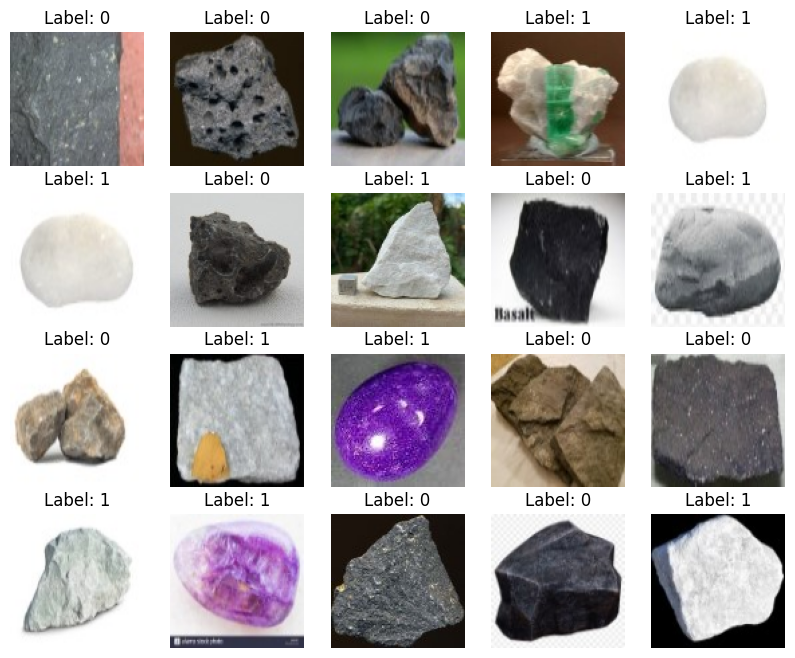

In [2]:
#display all training images using plt
print(X_train.size)
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.show()